In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as ns
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
train = pd.read_csv(r'C:/Users/Apu/Documents/Datset/Titanic/train.csv', dtype={"Age" : np.float64})
test = pd.read_csv(r'C:/Users/Apu/Documents/Datset/Titanic/test.csv',dtype={ "Age" : np.float64})
train.head()
test.head()
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [4]:
np.unique(train['Sex'])
#np.unique(train['Embarked'])
train['Embarked'].value_counts()
from sklearn.preprocessing import LabelBinarizer
#LabelBinarizer lb = LabelBinarizer()
#lb = LabelBinarizer()
#lb.fit_transform(train['Embarked'])

# This is done for feature clening makind things convert to int or float
#for better result can use any methods to convert them
def changeOfFeatureType(df):
    df.loc[df['Sex'] == 'male', 'Sex'] = 0
    df.loc[df['Sex'] == 'female', 'Sex'] = 1
    df.loc[df['Embarked'] == 'S','Embarked'] = 0
    df.loc[df['Embarked'] == 'C','Embarked'] = 1
    df.loc[df['Embarked'] == 'Q','Embarked'] = 2
    return df

In [5]:
#remove uncessery data ,clean data good for head lmao
def RemoveUnwantedColumns(df):
    drop_columns = ['Ticket','Name','Cabin']
    df = df.drop(drop_columns,1)
    return df


In [6]:
train_set = changeOfFeatureType(train)
train_set = RemoveUnwantedColumns(train_set)
test_set = changeOfFeatureType(test)
test_set = RemoveUnwantedColumns(test)
train.head()
train_set.head()
train_set.isnull().sum()
test_set.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [7]:
#just use print my is taken from qtconsole thst why only printling last head


In [8]:
test_set.loc[test_set['Fare'].isnull(),['Embarked','Pclass']]

,Embarked,Pclass
152,0,3


In [11]:
fare_dist = train_set.loc[(train_set.Embarked == 0) & (train_set.Pclass == 3),['Fare']]


fare_dist = fare_dist['Fare'].value_counts().head(20)
fare_dist.head(20)
fare_dist = fare_dist.reset_index()
fare_dist.columns = ['Fare', 'Counts']

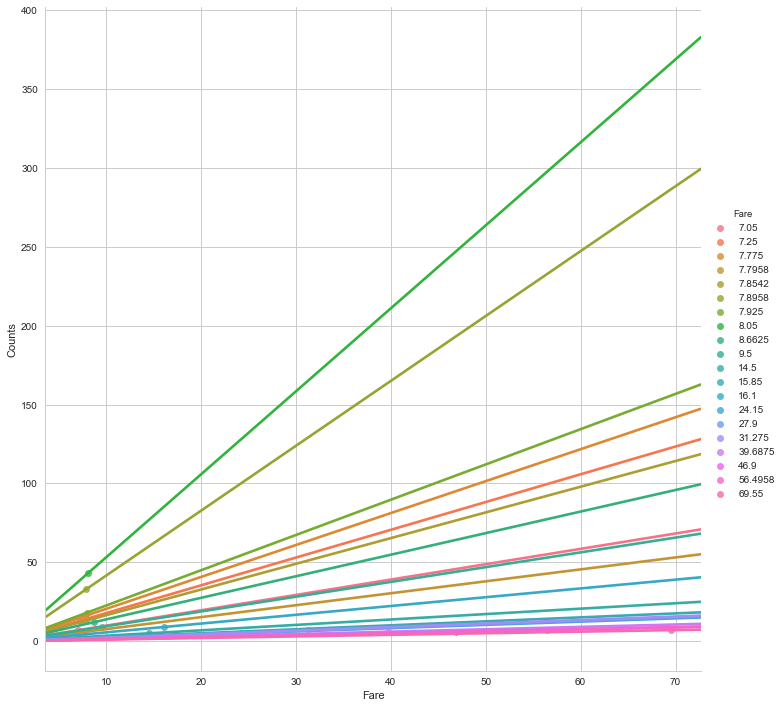

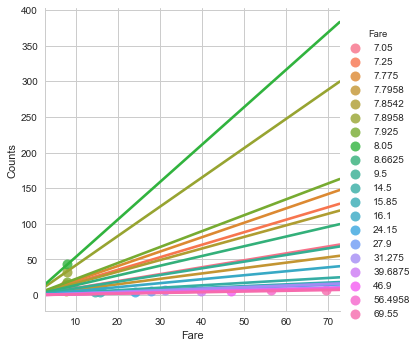

In [12]:
g = sns.lmplot('Fare','Counts',data=fare_dist,hue='Fare', size=10)
plt.xlabel('Fare')
plt.ylabel('Counts')
plt.show()
g = sns.lmplot('Fare','Counts',data=fare_dist,hue='Fare', size=5,scatter_kws={"s" : 100})
plt.xlabel('Fare')
plt.ylabel('Counts')
plt.show()

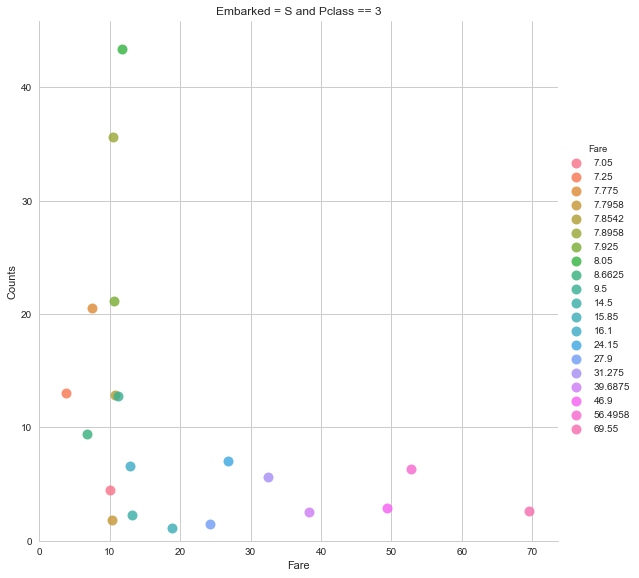

In [13]:
g = sns.lmplot('Fare', 'Counts',data=fare_dist,fit_reg=False,hue='Fare',x_jitter=5.0,y_jitter=5.0,size=8,scatter_kws={"s": 100})
g.set(xlim=(0, None))
g.set(ylim=(0, None))
plt.title('Embarked = S and Pclass == 3')
plt.xlabel('Fare')
plt.ylabel('Counts')
plt.show()

In [14]:
#this shows im noob with plotting :)


In [15]:
test_set.Fare = test_set['Fare'].fillna(8.050)
test_set.isnull().sum()
train_set.isnull().sum()
train_set['Embarked'] = train_set['Embarked'].fillna(1)
train_set.isnull().sum()
titanic_df =  train_set.append(pd.DataFrame(data=test_set),ignore_index=True)
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
train_set['Age'] = train_set['Age'].fillna(train_set['Age'].median())
test_set['Age'] = test_set['Age'].fillna(test_set['Age'].median())


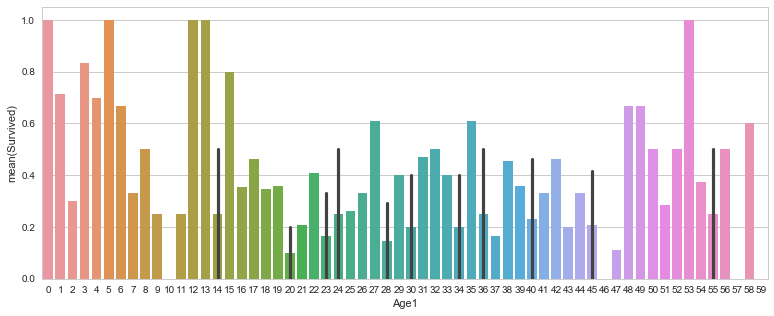

In [17]:
titanic_df['Age1'] = titanic_df.Age
titanic_df['Age1'] = titanic_df[titanic_df['Age1'] < 60]
fig = plt.figure(figsize=(13, 5))
average_age = titanic_df[["Age1", "Survived"]].groupby(['Age1'],as_index=False).mean()
average_age['Age1'] = average_age['Age1'].astype(int)
sns.barplot("Age1", "Survived",data=average_age)
plt.show()
fig = plt.figure(figsize=(13, 5))
alpha = 0.3

In [18]:
titanic_df[titanic_df.Survived==0].Age.value_counts().plot(kind='density', color='#6ACC65', label='Not Survived', alpha=alpha)
titanic_df[titanic_df.Survived==1].Age.value_counts().plot(kind='density', color='#FA2379', label='Survived', alpha=alpha)


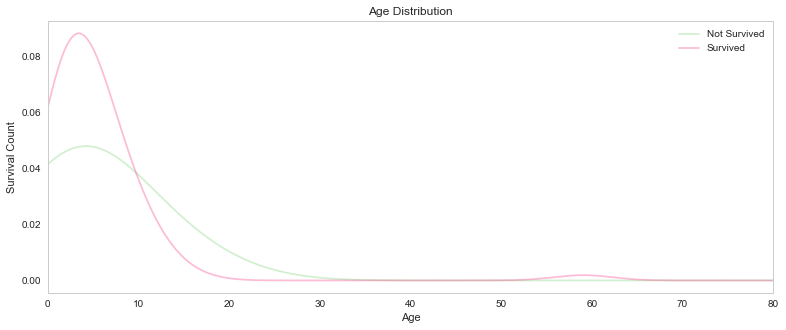

In [19]:
plt.xlim(0,80)
plt.xlabel('Age')
plt.ylabel('Survival Count')
plt.title('Age Distribution')
plt.legend(loc ='best')
plt.grid()
plt.show()

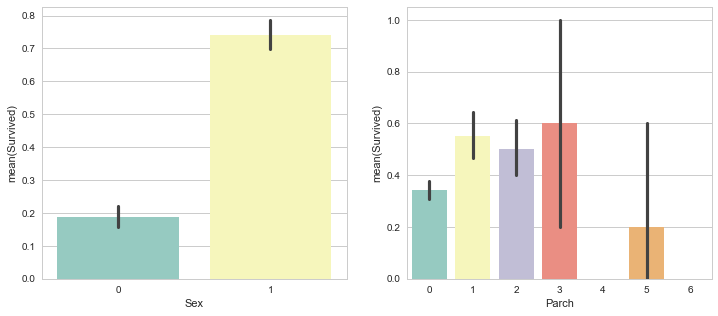

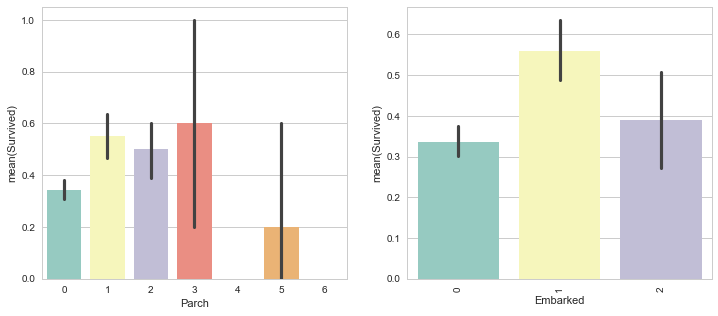

In [20]:
sex_survived = pd.crosstab(train_set["Sex"],train_set["Survived"])
parch_survived = pd.crosstab(train_set["Parch"],train_set["Survived"])
pclass_survived = pd.crosstab(train_set["Pclass"],train_set["Survived"])

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,5))    
sns.barplot(train_set["Sex"], train_set["Survived"], palette="Set3" ,ax=axis1)
sns.barplot(train_set["Parch"], train_set["Survived"], palette="Set3", ax=axis2)

fig, (axis3,axis4) = plt.subplots(1,2,figsize=(12,5))  
sns.barplot(train_set["Parch"], train_set["Survived"], palette="Set3", ax=axis3)
sns.barplot(train_set["Embarked"], train_set["Survived"], palette="Set3", ax=axis4)

plt.xticks(rotation=90)
plt.show()

In [21]:
## for logictic regreseeion

In [23]:

from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

imp_features = ["Pclass", "Sex", "Age", "Fare", "Embarked","SibSp", "Parch"]

model = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(
    model,
    train_set[imp_features],
    train_set["Survived"],
    cv=3
)
scores.mean()

0.78900112233445563

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation

imp_features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

model = RandomForestClassifier(
    random_state=1,
    n_estimators=150,
    min_samples_split=4,
    min_samples_leaf=2
)

scores = cross_validation.cross_val_score(
    model,
    train_set[imp_features],
    train_set["Survived"],
    cv=3
)

In [25]:
print(scores.mean())

0.820426487093


In [26]:
def submission_result(model, train_df, test_df, predictors, filename):

    model.fit(train_set[predictors], train_set["Survived"])
    predictions = model.predict(test_set[predictors])

    submission = pd.DataFrame({
        "PassengerId": test_set["PassengerId"],
        "Survived": predictions
    })
    print(submission.loc[submission['Survived'] == 1])

In [28]:
submission_result(model, train_set, test_set, imp_features,r'asas') 

     PassengerId  Survived
8            900         1
12           904         1
14           906         1
15           907         1
20           912         1
21           913         1
22           914         1
24           916         1
26           918         1
28           920         1
32           924         1
34           926         1
39           931         1
41           933         1
43           935         1
44           936         1
48           940         1
49           941         1
52           944         1
53           945         1
59           951         1
63           955         1
64           956         1
65           957         1
66           958         1
69           961         1
70           962         1
74           966         1
77           969         1
79           971         1
..           ...       ...
324         1216         1
326         1218         1
330         1222         1
333         1225         1
343         1235         1
3

In [29]:
## specify a file to save properly
## please use more methods n data as i am noob no idea for scores